# Exploratory Data Analysis (EDA) --- Finance Data

In [181]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Data cleaning

Remove year 1992 has NAs for ENROLL and OTHER_EXPENDITURE column, thus remove all 1992 data

In [182]:
financeSum = '/home/yulu/MLData/elsect_summary.csv'
df = pd.read_csv(financeSum)

In [183]:
df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [184]:
df = df.dropna(how = 'any').reset_index(drop = True)


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 12 columns):
STATE                           1173 non-null object
YEAR                            1173 non-null int64
ENROLL                          1173 non-null float64
TOTAL_REVENUE                   1173 non-null int64
FEDERAL_REVENUE                 1173 non-null int64
STATE_REVENUE                   1173 non-null int64
LOCAL_REVENUE                   1173 non-null int64
TOTAL_EXPENDITURE               1173 non-null int64
INSTRUCTION_EXPENDITURE         1173 non-null int64
SUPPORT_SERVICES_EXPENDITURE    1173 non-null int64
OTHER_EXPENDITURE               1173 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1173 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 110.0+ KB


# Data Explor 

## General 

In [186]:
df['REV_PER_ENROLL'] = df['TOTAL_REVENUE'] / df['ENROLL']

In [187]:
df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,REV_PER_ENROLL
0,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,3.885295
1,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,9.833586
2,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,5.068743
3,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,4.324890
4,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,5.466764


In [188]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,REV_PER_ENROLL
count,1173.000000,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1.173000e+03,1173.000000
mean,2004.000000,9.160265e+05,9.113247e+06,7.754734e+05,4.229166e+06,4.108608e+06,9.227706e+06,4.771083e+06,2.686234e+06,4.231043e+05,9.156847e+05,10.003549
std,6.636079,1.063425e+06,1.161943e+07,1.152853e+06,5.470060e+06,5.418146e+06,1.188887e+07,6.225092e+06,3.325406e+06,5.248700e+05,1.340665e+06,3.982661
min,1993.000000,4.386600e+04,4.656500e+05,3.367200e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,3.543637
25%,1998.000000,2.629350e+05,2.191695e+06,1.918400e+05,1.182776e+06,7.159800e+05,2.178778e+06,1.177781e+06,6.420900e+05,1.005860e+05,1.858500e+05,7.091991
50%,2004.000000,6.480840e+05,5.169926e+06,4.100510e+05,2.545353e+06,2.083075e+06,5.298267e+06,2.701637e+06,1.545738e+06,2.691570e+05,5.119440e+05,9.244919
75%,2010.000000,1.009200e+06,1.084872e+07,8.354640e+05,5.132066e+06,4.742205e+06,1.074668e+07,5.585476e+06,3.217615e+06,5.105030e+05,9.828930e+05,11.716290
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.318764e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,1.022366e+07,29.948695


In [210]:
state_group = df.groupby('STATE')

## Enroll

Data pivoting for enrollment of each state in all different years

<Figure size 432x288 with 0 Axes>

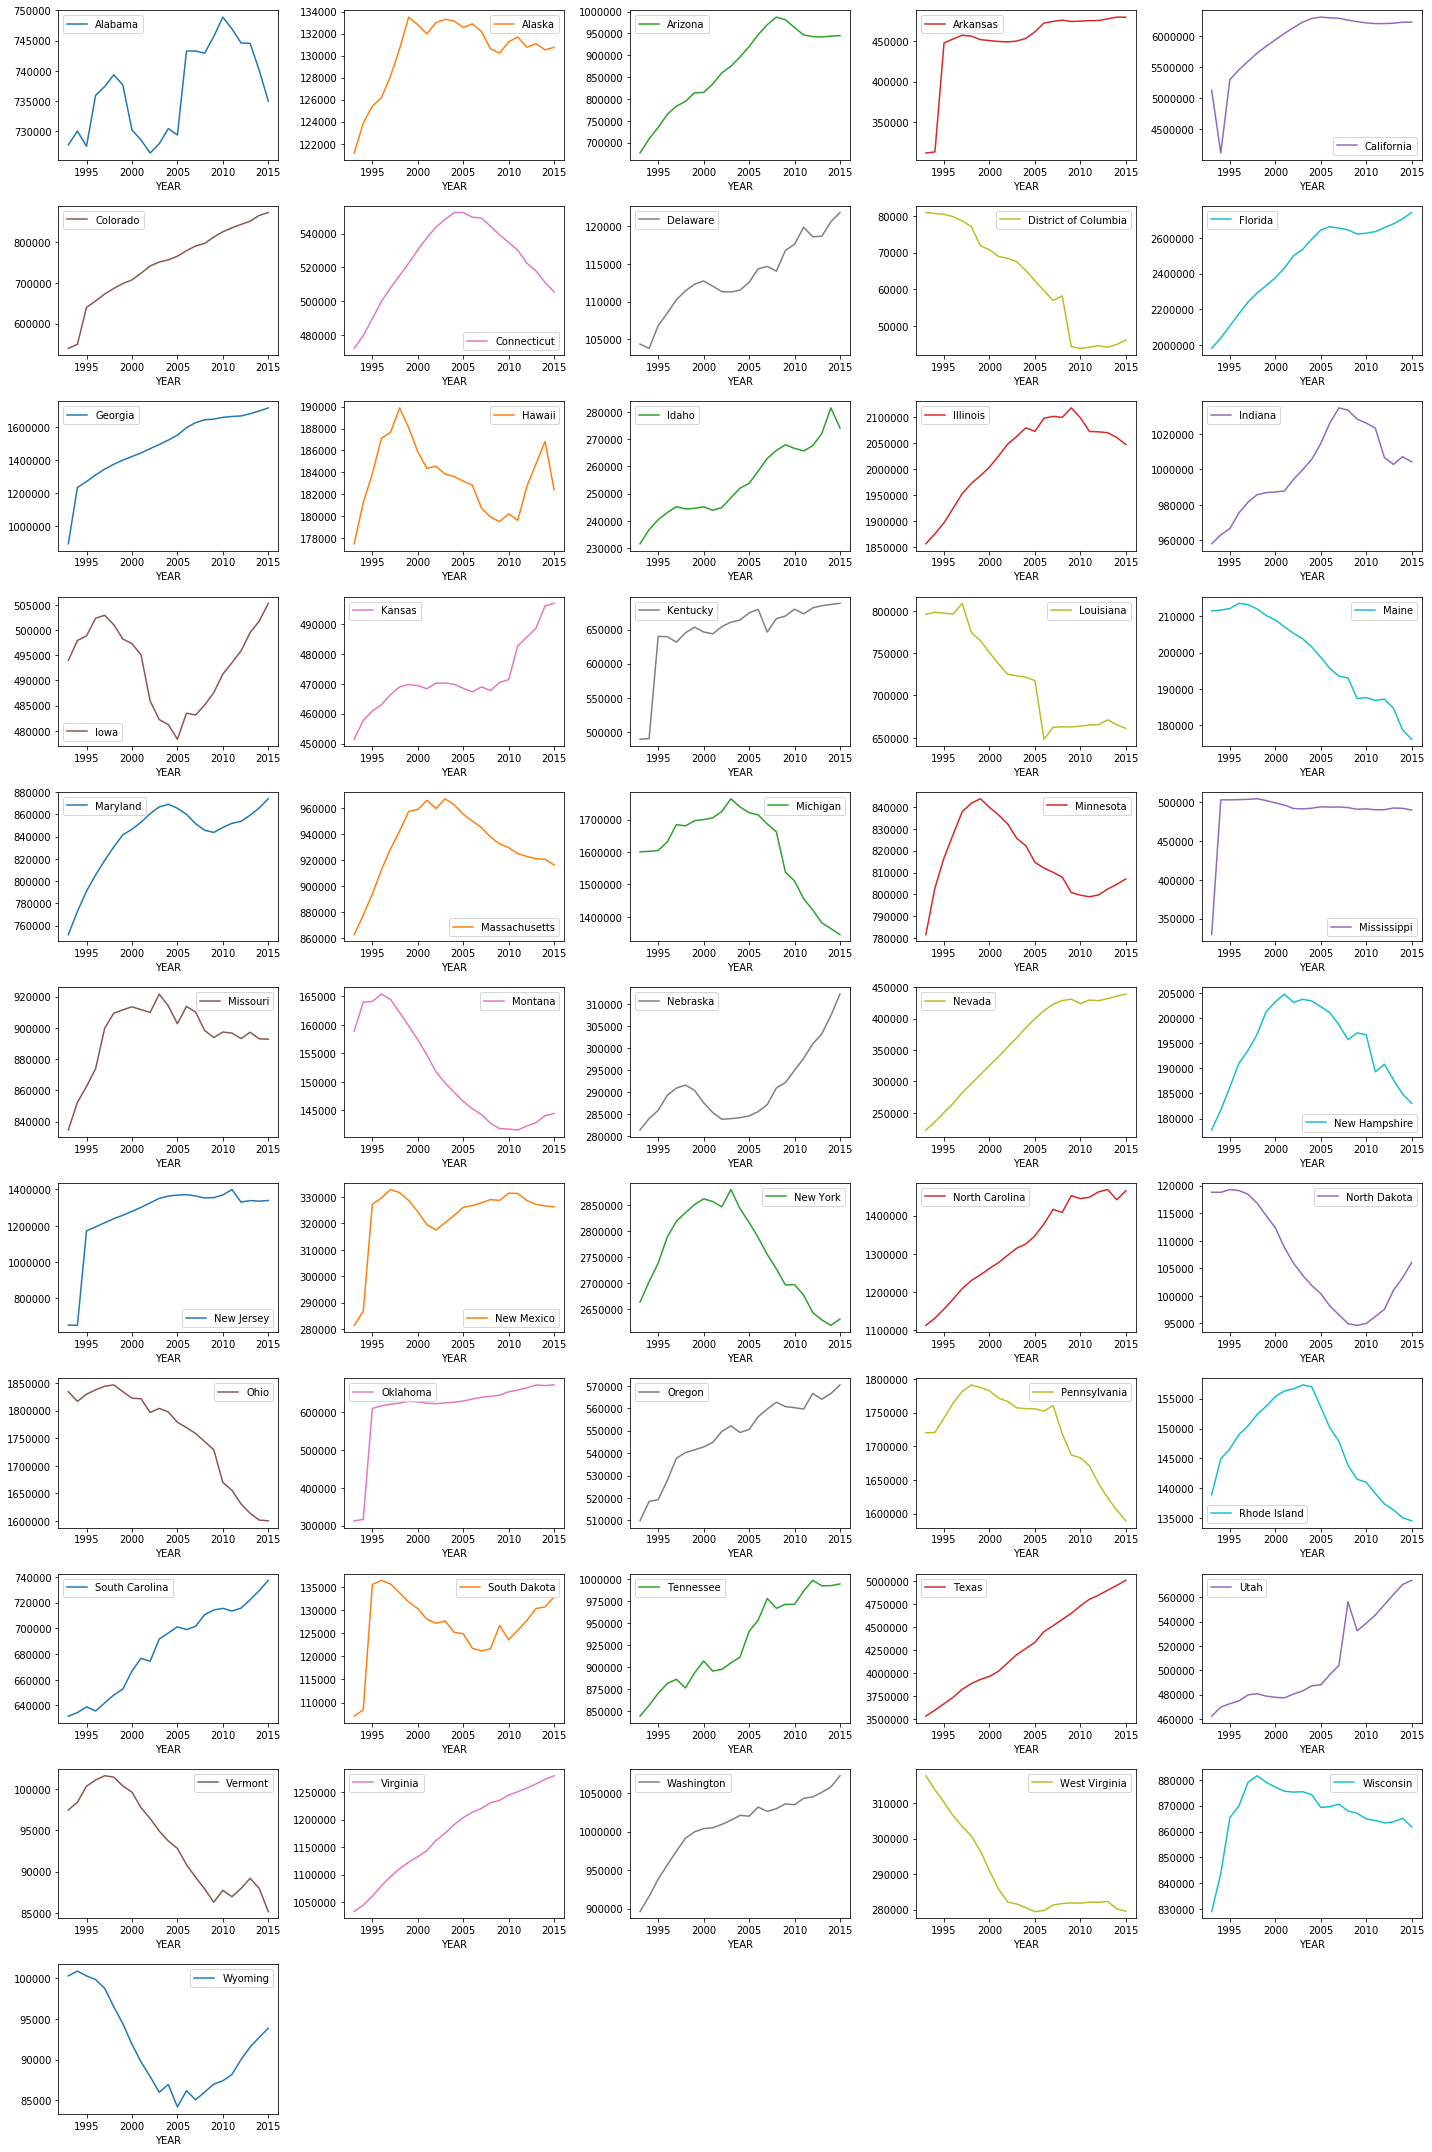

In [294]:
_ = plt.figure()
_ = df.pivot(index = 'YEAR', columns = 'STATE', values='ENROLL').plot(
    kind='line', subplots=True, layout=(11, 5), figsize = (20, 30), sharex = False)
plt.tight_layout()
plt.show()

## TOTAL_REVENUE |  TOTAL_EXPENDITURE

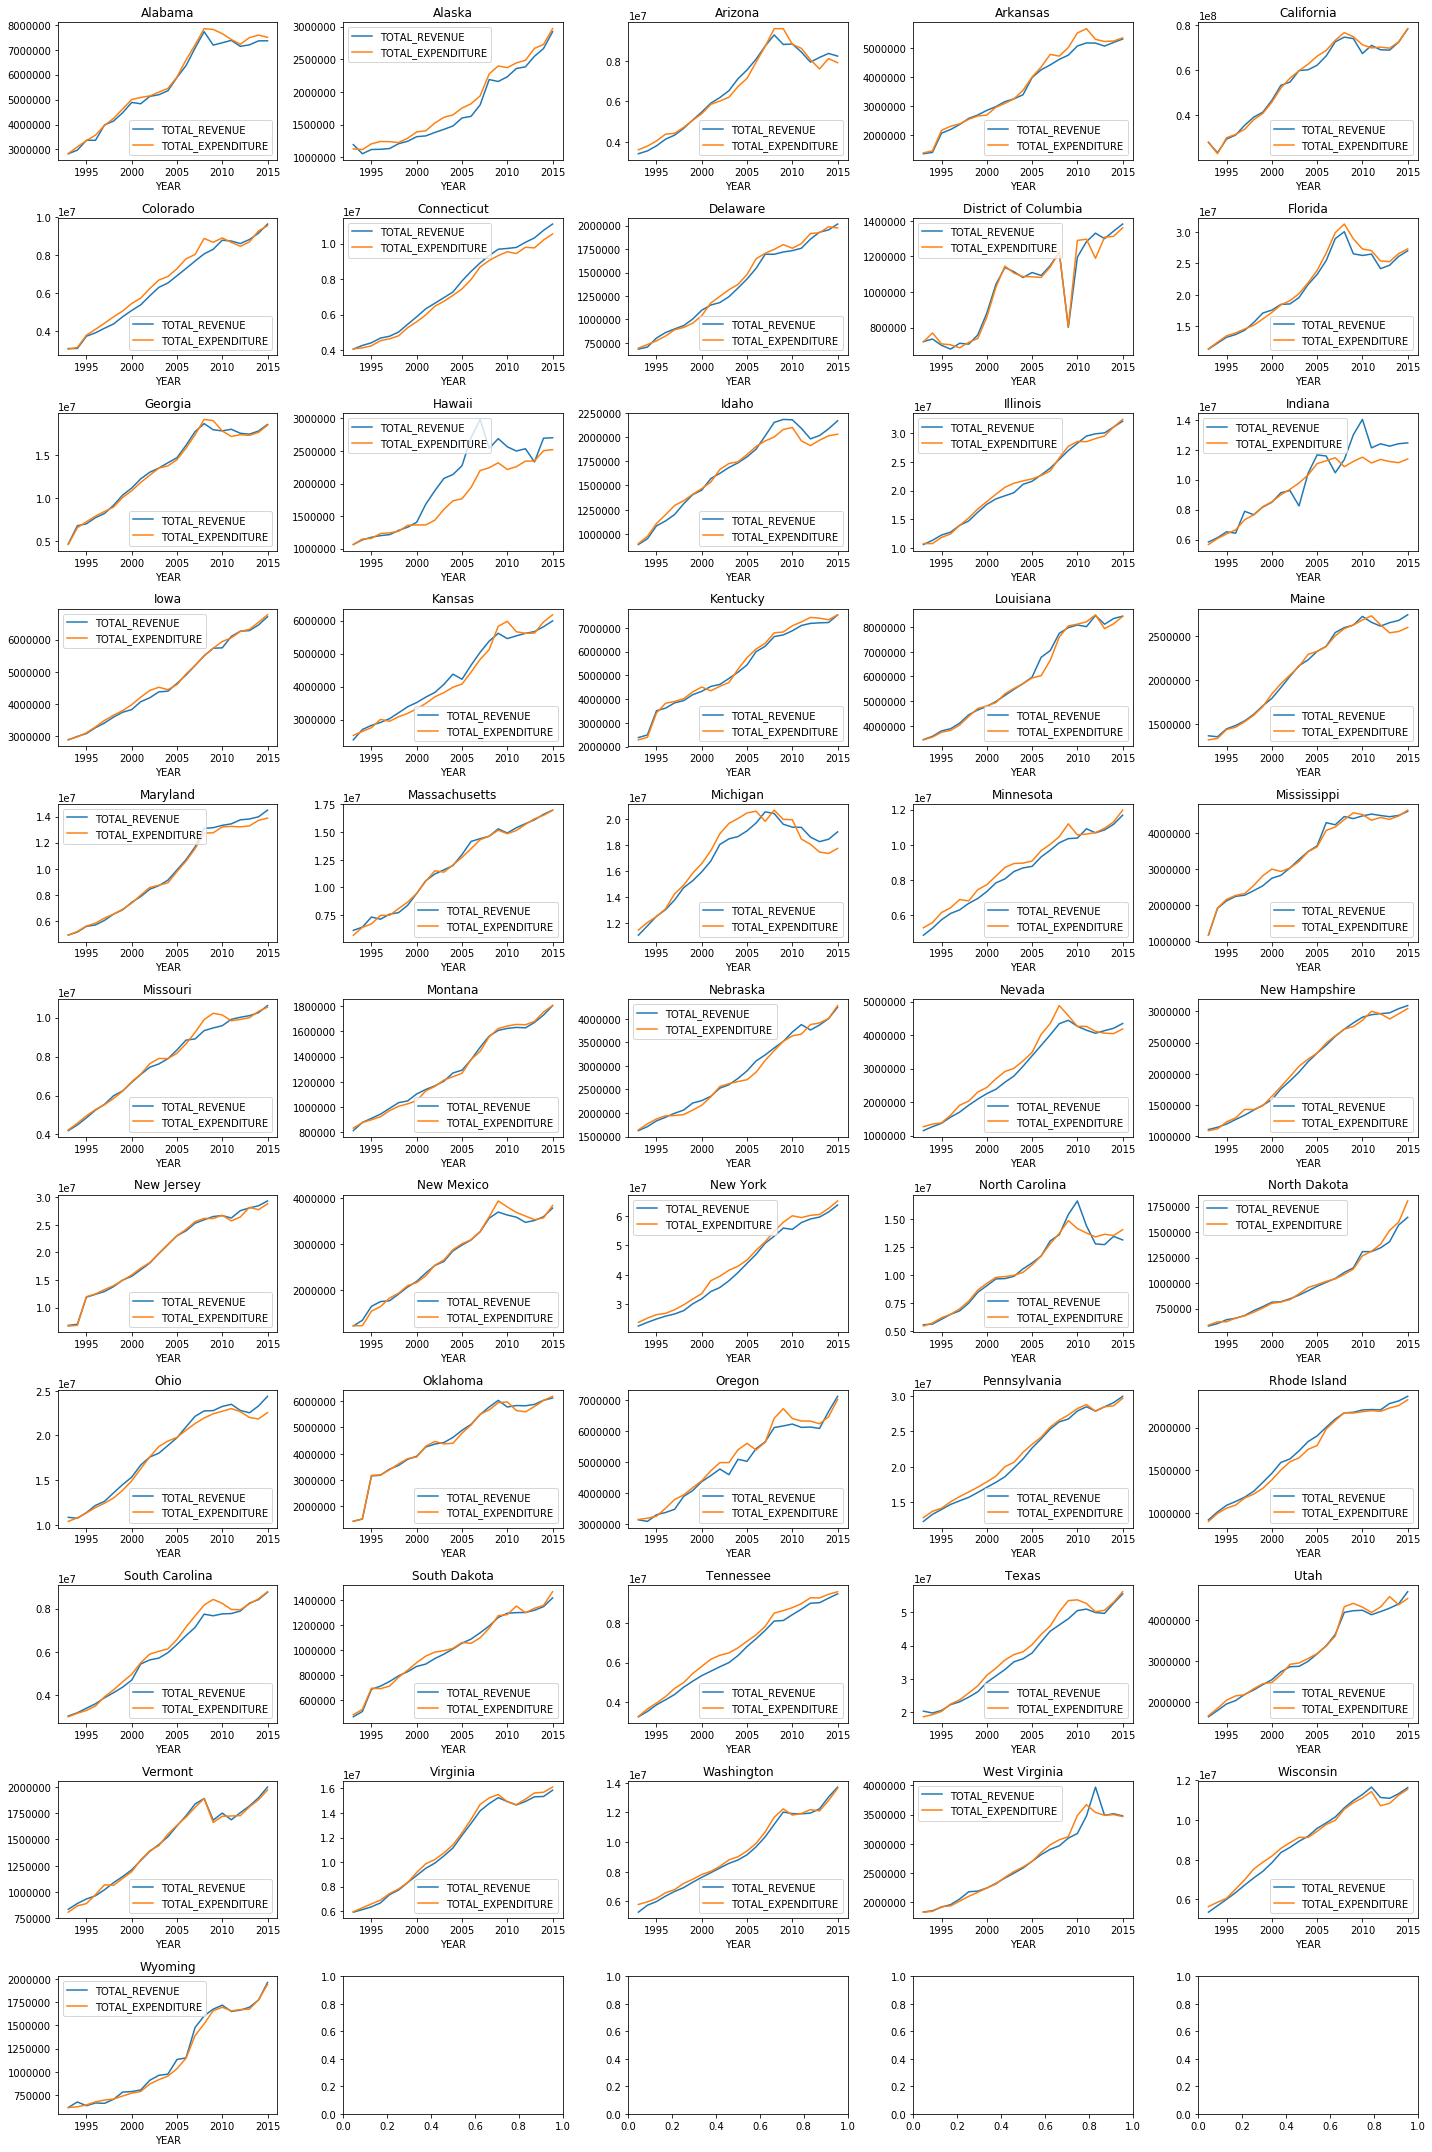

In [291]:
fig, axes = plt.subplots(11, 5, figsize = (20, 30))
axes = axes.flatten()
for ax, d in zip(axes, state_group):
    d[1].plot(x = 'YEAR', y = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'], ax = ax, label = 0, title = d[0], kind = 'line')
plt.tight_layout() 

# TOTAL_REVENUE / ENROLL

In [253]:
state_sort = df[df.YEAR == 2015][['STATE', 'REV_PER_ENROLL']].sort_values(by = 'REV_PER_ENROLL').STATE

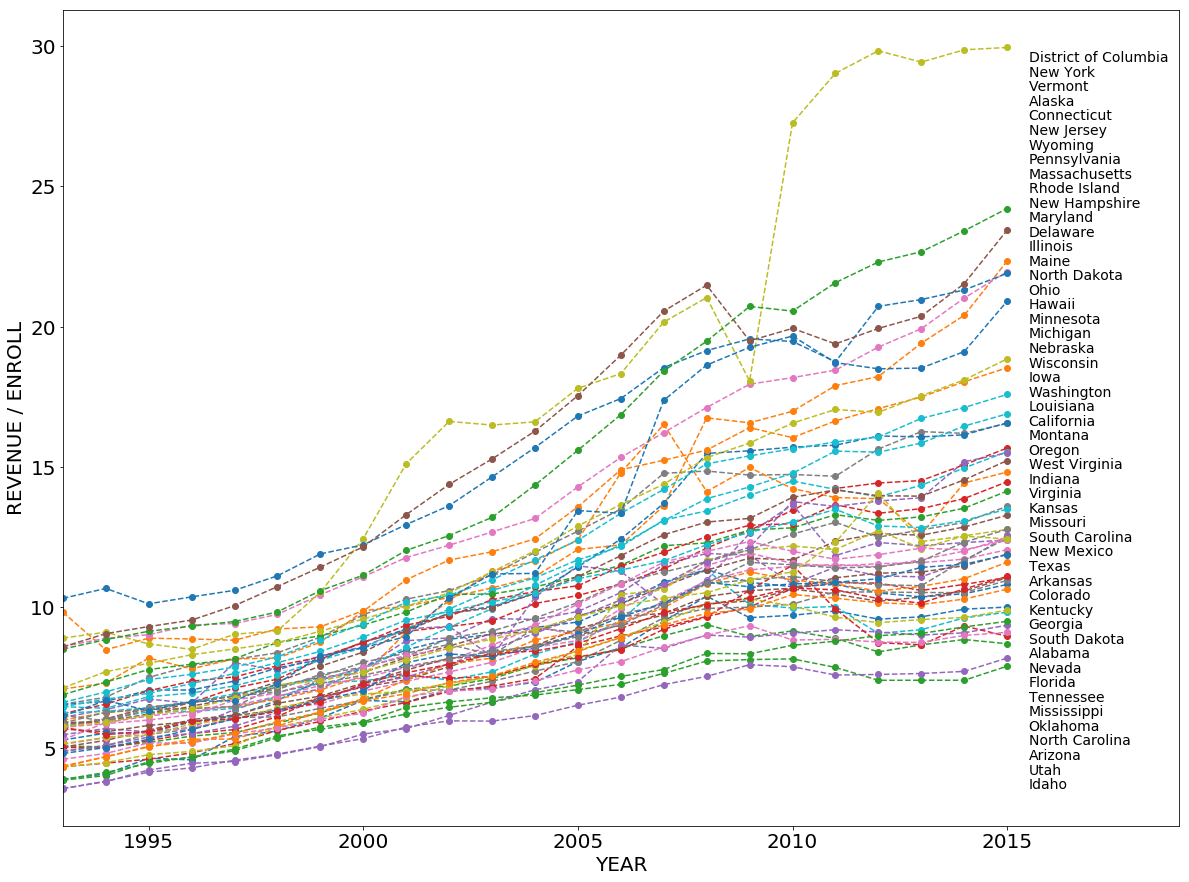

In [281]:
fig, ax = plt.subplots( figsize = (20, 15))
max_rev = state_group.REV_PER_ENROLL.max().max()
min_rev = state_group.REV_PER_ENROLL.min().min()
step = (max_rev  - min_rev) / 51
for d in state_group:
    d[1].plot(x = 'YEAR', y = 'REV_PER_ENROLL', kind = 'line', ax = ax, style = 'o--', legend = False, fontsize= 20)
for i, st in enumerate(state_sort):
    ax.text(2015.5, i * step + min_rev, st, fontsize = 14)
    #ax.text(2016, d[1].REV_PER_ENROLL.iloc[-1], d[0])
    #ax.text(2016, d[1].REV_PER_ENROLL.max(), d[0])
ax.set_ylabel('REVENUE / ENROLL', fontsize = 20)
ax.set_xlabel('YEAR', fontsize = 20)
_= ax.set_xlim([1993, 2019])

    

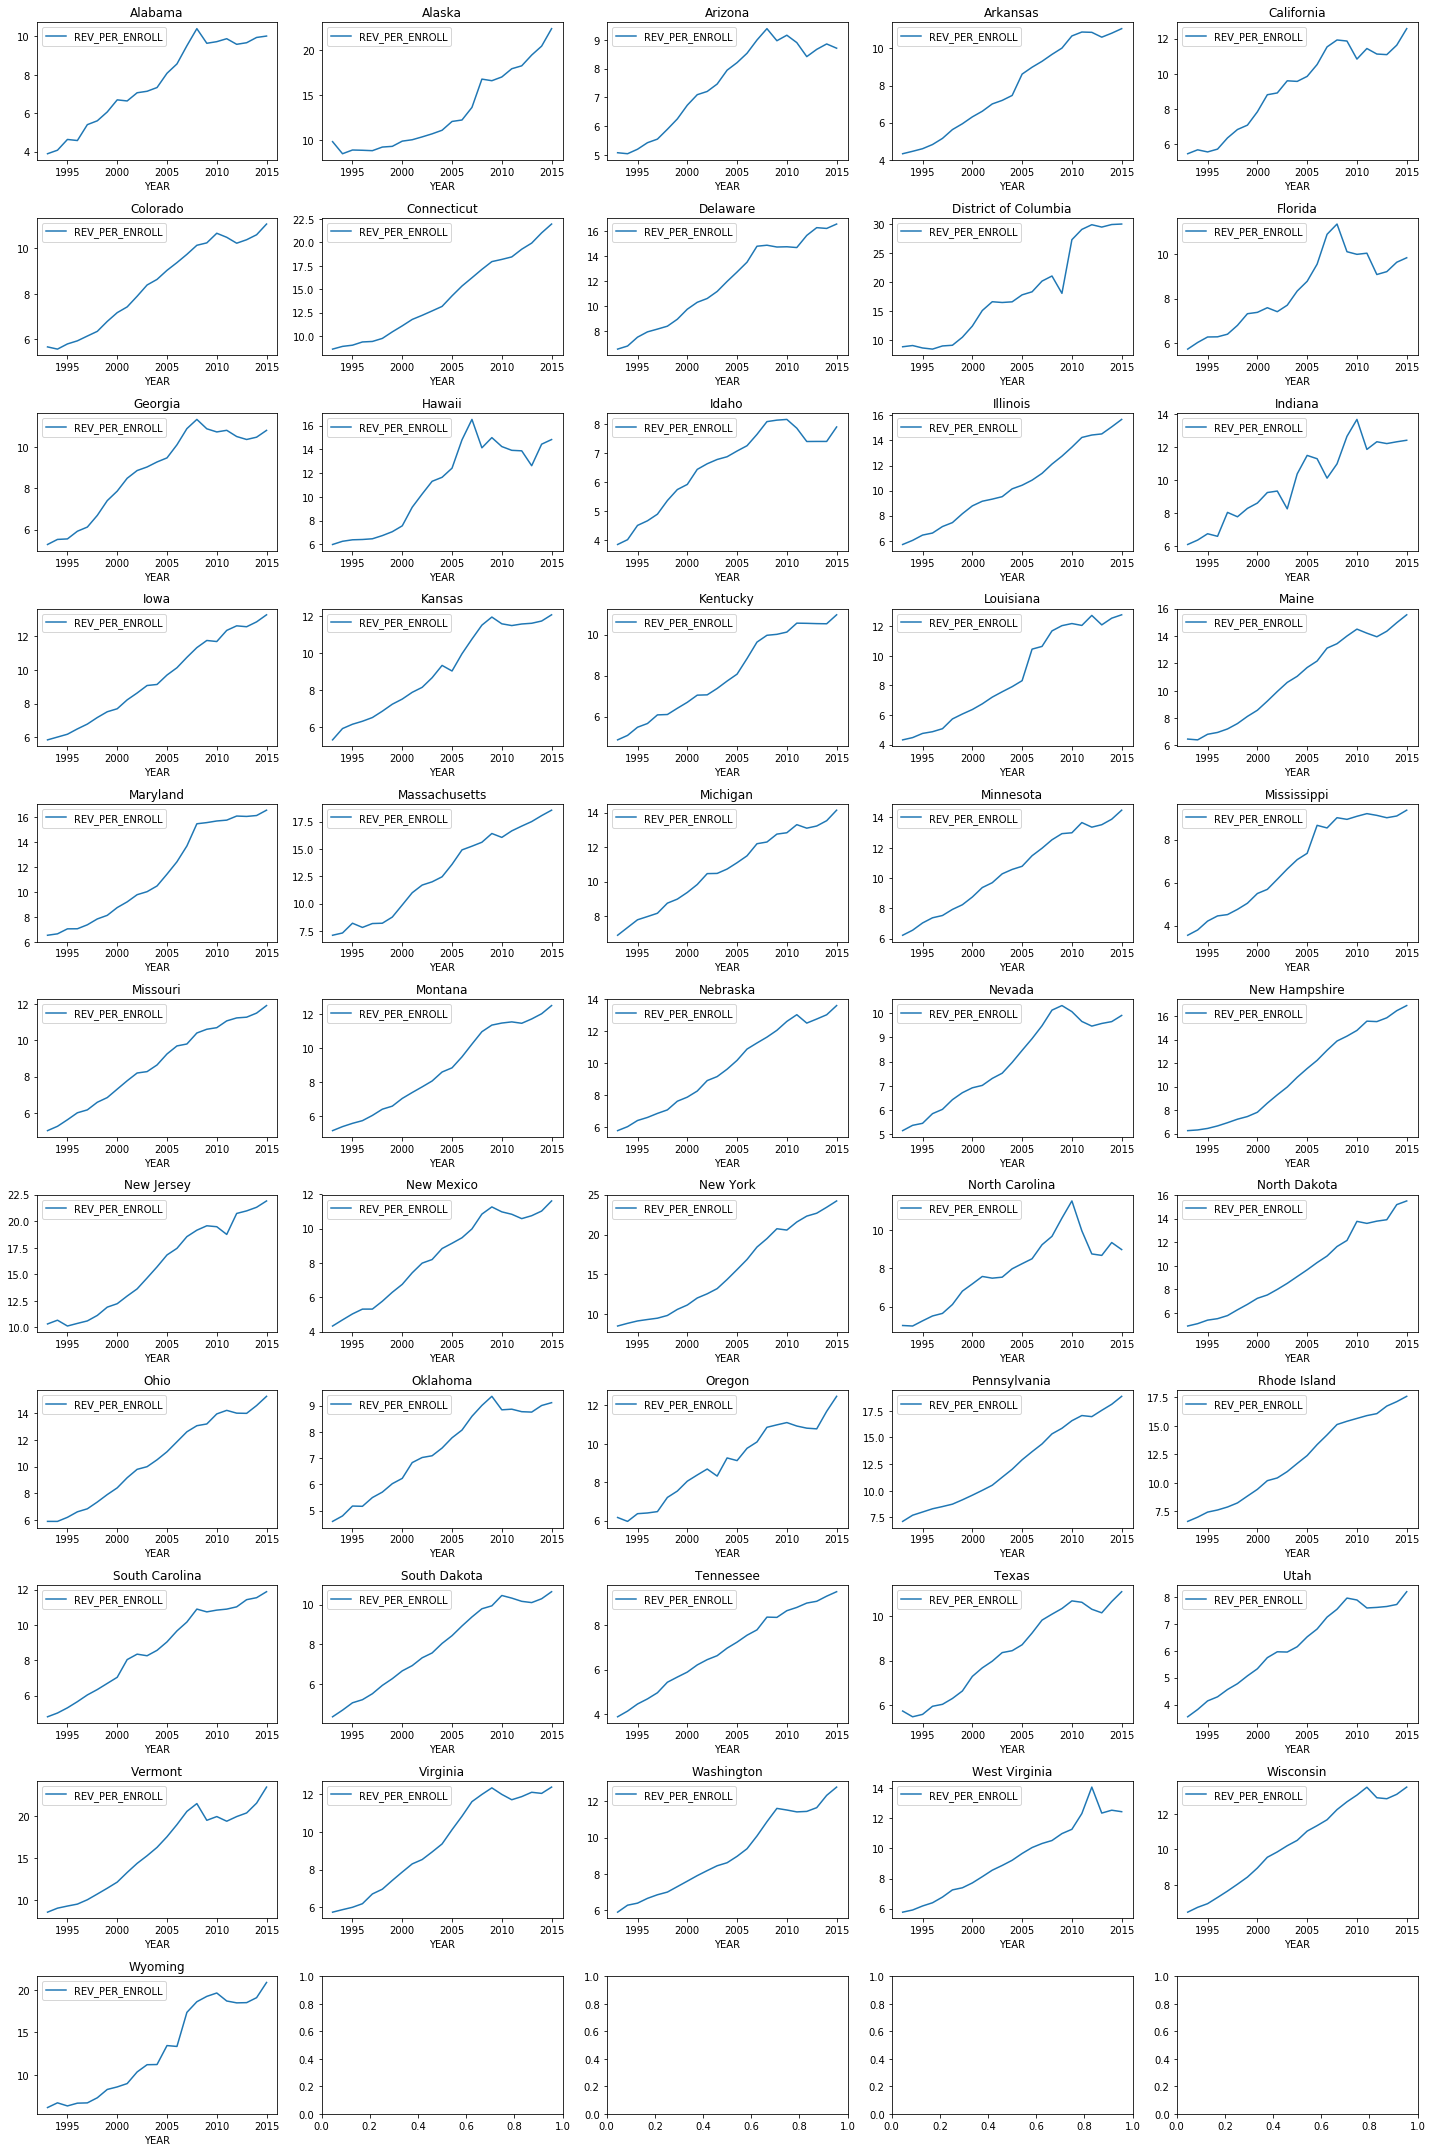

In [282]:
fig, axes = plt.subplots(11, 5, figsize = (20, 30))
axes = axes.flatten()
for ax, d in zip(axes, df.groupby('STATE')):
    d[1].plot(x = 'YEAR', y = 'REV_PER_ENROLL', kind = 'line', ax = ax, title = d[0])
plt.tight_layout()